In [20]:
%%html
<style>
    .custom-text-lt input:disabled {
        color: green !important;
    }
    .custom-text-eq input:disabled {
        color: gray !important;
    }
    .custom-text-gt input:disabled {
        color: red !important;
    }
</style>

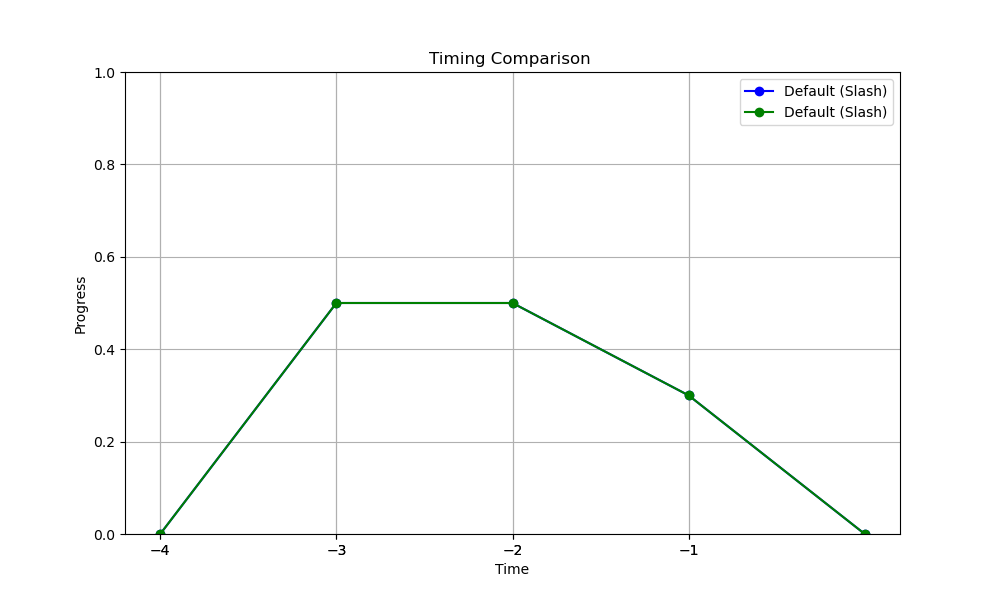

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
%matplotlib widget

def load_csv(file_path):
    df = pd.read_csv(file_path)
    df[['ItemName', 'AttackType']] = df.iloc[:, 0].str.split('.', expand=True)
    return df

def extract_adsr_data(df, weapon_name, attack_type):
    adsr_columns = ['Holding', 'Windup', 'Release', 'Recovery']
    filtered_df = df[(df['ItemName'] == weapon_name) & (df['AttackType'] == attack_type)]
    if filtered_df.empty:
        return None
    return filtered_df[['ItemName', 'AttackType'] + adsr_columns]

fig, ax = plt.subplots(figsize=(10, 6))
hdisplay = display(display_id=True)
def plot_adsr(adsr_data_list):
    # clear_output(wait=True)
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    ax.clear()
    tarr = []
    for i, adsr_data in enumerate(adsr_data_list):
        if adsr_data is not None:
            row = adsr_data.iloc[0]
            times = np.cumsum([0] + row[['Holding', 'Windup', 'Release', 'Recovery']].tolist())
            tarr.append(times[1:])
            # for tidx, t in enumerate(times[1:]):
            #      w_list[i][tidx].value = str(round(t*1000))
            # display(adsr_data)
            amplitudes = [0, 0.3, 0.5,  0.5, 0]
            ax.plot(times, amplitudes, marker='o', linestyle='-', label=f"{row['ItemName']} ({row['AttackType']})", color=colors[i % len(colors)])
    tdiff = tarr[1]-tarr[0]
    for idx, t_list in enumerate(tarr):
        for idx2, time in enumerate(t_list):
            twidget = w_list[idx][idx2]
            twidget.value = str(round(time*1000))
            twidget.remove_class('custom-text-gt')
            twidget.remove_class('custom-text-lt')
            twidget.remove_class('custom-text-eq')
            if idx == 1:
                if tdiff[idx2] > 0:
                    twidget.add_class('custom-text-gt')
                elif tdiff[idx2] < 0:
                    twidget.add_class('custom-text-lt')
                else:
                    twidget.add_class('custom-text-eq')

    ax.set_xticks([*tarr[0], *tarr[1]], minor=True)
    # ax.set_xticklabels(['A','A','A','A','B','B','B',''])
    ax.set_xlabel('Time')
    ax.set_ylabel('Progress')
    ax.set_title('Timing Comparison ')
    ax.legend()
    ax.set_ylim(0, 1)
    ax.grid(True)
    # hdisplay.update(fig)

def update_plot(*args):
    selected_data = [
        extract_adsr_data(df, weapon1_dropdown.value, attack1_dropdown.value),
        extract_adsr_data(df, weapon2_dropdown.value, attack2_dropdown.value)
    ]
    plot_adsr(selected_data)
    # hdisplay.update(fig)

# Example usage:
file_path = "AbilitiesOverride.csv"
df = load_csv(file_path)
weapon_names = df['ItemName'].unique().tolist()
attack_types = df['AttackType'].unique().tolist()

weapon1_dropdown = widgets.Dropdown(options=weapon_names, description="Weapon 1:")
attack1_dropdown = widgets.Dropdown(options=attack_types, description="Attack 1:")
weapon2_dropdown = widgets.Dropdown(options=weapon_names, description="Weapon 2:")
attack2_dropdown = widgets.Dropdown(options=attack_types, description="Attack 2:")

weapon1_dropdown.observe(update_plot, names='value')
attack1_dropdown.observe(update_plot, names='value')
weapon2_dropdown.observe(update_plot, names='value')
attack2_dropdown.observe(update_plot, names='value')

def create_value_widgets():
    w_list = []
    for i in ['Holding', 'Windup', 'Release', 'Recovery']:
        twidget = widgets.Text(description=i,value='0', disabled=True)
        # twidget.add_class('custom-text')
        w_list.append(twidget)
    return w_list

w_list = [create_value_widgets(), create_value_widgets()]

update_plot()
gui = widgets.VBox([
widgets.HBox([weapon1_dropdown, attack1_dropdown]),
widgets.HBox(w_list[0]),
widgets.HBox([weapon2_dropdown, attack2_dropdown]),
widgets.HBox(w_list[1]),
])

display(gui)
# display(weapon1_dropdown, attack1_dropdown, weapon2_dropdown, attack2_dropdown)
